<a href="https://colab.research.google.com/github/pandian-raja/EVA4_Session10/blob/master/Session_10_LR_Trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install albumentations
!pip install torchsummary
from torchsummary import summary
import numpy as np
!pip install torch-lr-finder
from torch_lr_finder import LRFinder


  pip install torch-lr-finder -v --global-option="amp"


In [2]:
!wget https://raw.githubusercontent.com/pandian-raja/EVA4_Session8/master/resnet.py

--2020-03-31 09:44:10--  https://raw.githubusercontent.com/pandian-raja/EVA4_Session8/master/resnet.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4005 (3.9K) [text/plain]
Saving to: ‘resnet.py’

resnet.py           100%[===================>]   3.91K  --.-KB/s    in 0s      

2020-03-31 09:44:10 (94.3 MB/s) - ‘resnet.py’ saved [4005/4005]



In [0]:
!wget https://raw.githubusercontent.com/pandian-raja/EVA4_Session7/master/train_and_validate.py

--2020-03-17 22:37:04--  https://raw.githubusercontent.com/pandian-raja/EVA4_Session7/master/train_and_validate.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2734 (2.7K) [text/plain]
Saving to: ‘train_and_validate.py’

train_and_validate. 100%[===================>]   2.67K  --.-KB/s    in 0s      

2020-03-17 22:37:05 (57.5 MB/s) - ‘train_and_validate.py’ saved [2734/2734]



In [3]:
!wget https://raw.githubusercontent.com/pandian-raja/EVA4_Session9/master/GetData.py

--2020-03-31 09:44:10--  https://raw.githubusercontent.com/pandian-raja/EVA4_Session9/master/GetData.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3234 (3.2K) [text/plain]
Saving to: ‘GetData.py’

GetData.py          100%[===================>]   3.16K  --.-KB/s    in 0s      

2020-03-31 09:44:10 (67.7 MB/s) - ‘GetData.py’ saved [3234/3234]



In [0]:
import resnet as rs
# import train_and_validate as tv
import GetData as gd

In [7]:
trainloader, testloader, classes, device = gd.GetData.importDataset()


CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
model = rs.ResNet18().to(device);


In [9]:
summary(model, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

def train(trainloader, device, model,EPOCH):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)
        for epoch in range(EPOCH):
            running_loss = 0.0
            correct = 0
            total = 0
            for i, data in enumerate(trainloader, 0):
                # get the inputs
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()    
               

                # print statistics
                running_loss += loss.item()
                if i % 2000 == 1999:    # print every 2000 mini-batches
                    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
                    running_loss = 0.0
            
            # print('Epoch {} completed'.format(epoch))
            # print('Loss: {}. Accuracy: {}'.format(loss.item(), accuracy))
            # print('-'*20)
            # accuracy = 100 * correct / total
            print((running_loss / 2000))
            scheduler.step(100-(running_loss / 2000))

        lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
        lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
        lr_finder.plot() # to inspect the loss-learning rate graph
        lr_finder.reset()
        print('Finished Training')
        return model

[1,  2000] loss: 2.098
[1,  4000] loss: 1.966
[1,  6000] loss: 1.845
[1,  8000] loss: 1.760
[1, 10000] loss: 1.672
[1, 12000] loss: 1.591
0.3869575450122356
[2,  2000] loss: 1.518
[2,  4000] loss: 1.447
[2,  6000] loss: 1.393
[2,  8000] loss: 1.362
[2, 10000] loss: 1.283
[2, 12000] loss: 1.243
0.30460989916324616


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



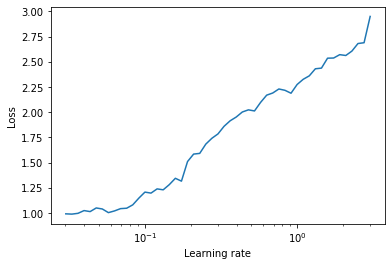

Finished Training


In [38]:
model = train(trainloader,device,model,35)


In [0]:
def validate(testloader, device, model):
        dataiter = iter(testloader)
        images, labels = dataiter.next()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the 10000 test images: %2d %%' % ((100 * correct) / total))  

In [36]:
validate(testloader,device,model)

Accuracy of the network on the 10000 test images: 15 %
